In [1]:
using InMemoryDatasets, StatisticalGraphics, DLMReader

`Segment` produces line segments. For each segment the main coordinate and the lower and the upper value must be supplied.

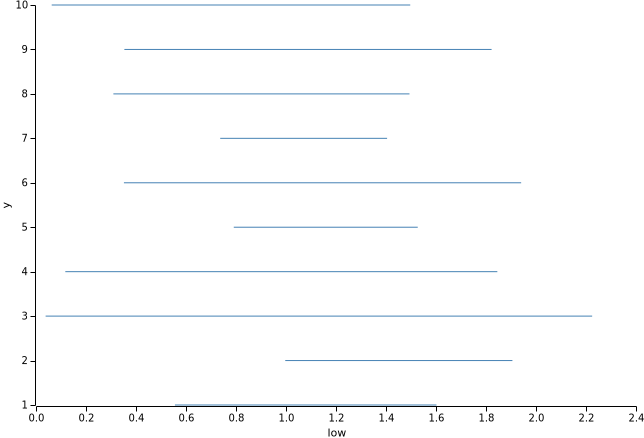

In [2]:
ds = Dataset(y=1:10, low=rand(10), up=rand(10) .+ 1.3)
sgplot(ds,
        Segment(y=:y, lower=:low, upper=:up),
        clip=false
      )

Overlay Scatter plot

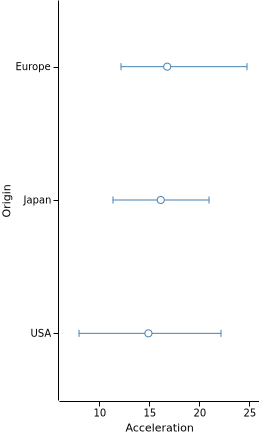

In [3]:
cars = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                                 "..", "docs", "assets", "cars.csv"),
                                 types=Dict(9=>Date))
cars_sum = combine(groupby(cars, :Origin), 1=>[IMD.mean, IMD.maximum, IMD.minimum])

sgplot(cars_sum,
                [
                    Segment(y=:Origin, lower=r"^min", upper=r"^max"),
                    Scatter(y=:Origin, x=r"^mean"),
                    Scatter(y=:Origin, x=r"^min", symbol=:stroke, angle=90),
                    Scatter(y=:Origin, x=r"^max", symbol=:stroke, angle=90)
                ],
                xaxis=Axis(title="Acceleration", padding=10),
                yaxis=Axis(padding=.5),
                width=200
        )

`Segment` like other plots accept `group`.

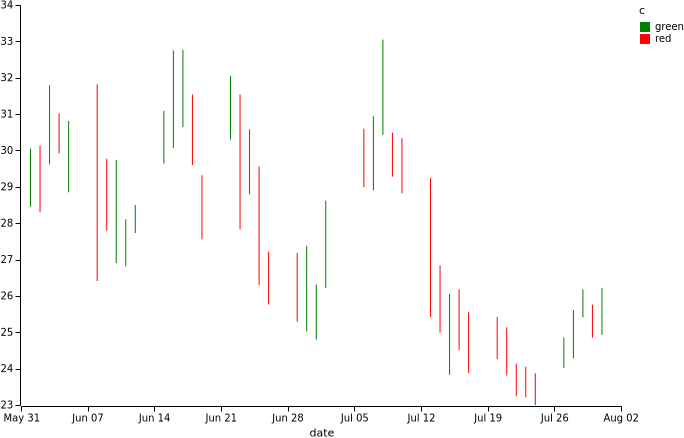

In [4]:
ohlc = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                                 "..", "docs", "assets", "ohlc.csv"),
                                 types = Dict(2=>Date, 8=>Symbol))

sgplot(ohlc,
        Segment(x=:date, lower=:low, upper=:high, group=:c),
        groupcolormodel=ohlc[:, :c],
        xaxis=Axis(type=:time),
        yaxis=Axis(title="")
      )

Candlestick Chart

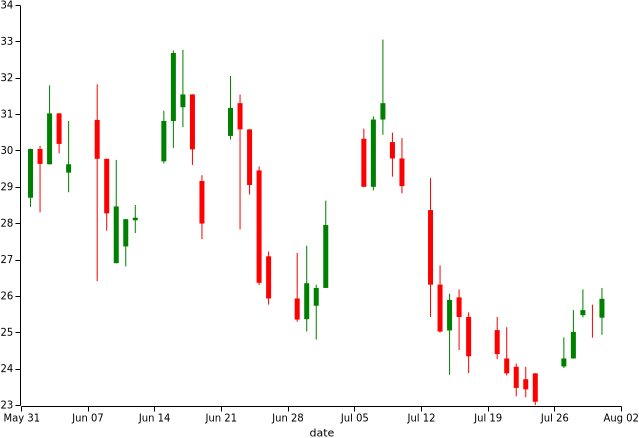

In [5]:
sgplot(ohlc,
        [
            Segment(x=:date, lower=:open, upper=:close, group=:c, thickness=5),
            Segment(x=:date, lower=:low, upper=:high, group=:c)
        ],
        groupcolormodel=ohlc[:, :c],
        xaxis=Axis(type=:time),
        yaxis=Axis(title=""),
        legend=false
      )

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*